In [1]:
try:
    reload(galpy.df_src.streamdf)
except NameError:
    import galpy.df_src.streamdf
import numpy
from galpy.orbit import Orbit
from galpy.potential import LogarithmicHaloPotential
from galpy.actionAngle import actionAngleIsochroneApprox
from galpy.util import bovy_conversion #for unit conversions
from galpy.util import bovy_plot
%pylab inline
R0, V0= 8., 220.

Populating the interactive namespace from numpy and matplotlib


# Tests of some improvements to the smooth streamdf code

In [2]:
lp= LogarithmicHaloPotential(normalize=1.,q=0.9)
aAI= actionAngleIsochroneApprox(pot=lp,b=0.8)
obs= Orbit([1.56148083,0.35081535,-1.15481504,0.88719443,-0.47713334,0.12019596])
sigv= 0.365 #km/s
sdf= galpy.df_src.streamdf.streamdf(sigv/220.,progenitor=obs,pot=lp,aA=aAI,leading=True,nTrackChunks=11,
              tdisrupt=4.5/bovy_conversion.time_in_Gyr(V0,R0))

In [3]:
xs= numpy.linspace(0.,2.,101)
dens= numpy.array([sdf.density_par(x) for x in xs])
numpy.random.seed(1)
aa_mock_per= sdf.sample(n=10000,returnaAdt=True)
apar= numpy.dot(aa_mock_per[1].T-sdf._progenitor_angle,sdf._dsigomeanProgDirection)

Stream length: 0.986943


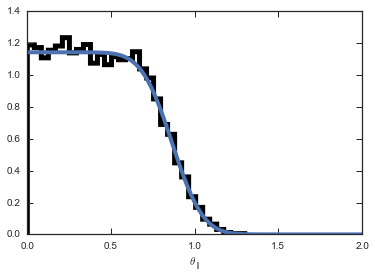

In [4]:
plot(xs,dens/numpy.sum(dens)/(xs[1]-xs[0]),lw=4.)
dum= hist(numpy.fabs(apar),bins=31,normed=True,histtype='step',color='k',zorder=0,lw=5.)
xlabel(r'$\theta_\parallel$')
print "Stream length: %f" % sdf.length()

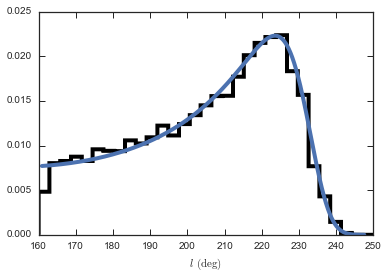

In [5]:
dens_l= numpy.array([sdf.density_par(x,coord='ll') for x in sdf._interpolatedThetasTrack])
lb= sdf.sample(n=10000,lb=True)
plot(sdf._interpolatedObsTrackLB[:,0],
     dens_l/numpy.sum(dens_l*(
     numpy.roll(sdf._interpolatedObsTrackLB[:,0],-1)-sdf._interpolatedObsTrackLB[:,0])),lw=4.)
dum= hist(lb[0],range=[160.,250.],bins=31,normed=True,histtype='step',lw=4.,color='k')
xlabel(r'$l\,(\mathrm{deg})$')

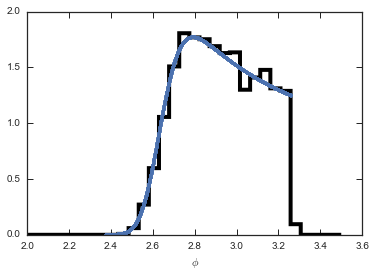

In [6]:
dens_phi= numpy.array([sdf.density_par(x,coord='phi') for x in sdf._interpolatedThetasTrack])
RvR= sdf.sample(n=10000)
plot((sdf._interpolatedObsTrack[:,5]-numpy.pi) % (2.*numpy.pi),
     7.5*dens_phi/numpy.sum(dens_phi*(
     numpy.roll(sdf._interpolatedObsTrack[:,5],-1)-sdf._interpolatedObsTrack[:,5])),'.',lw=4.)
dum= hist((RvR[5]-numpy.pi) % (2.*numpy.pi),
          range=[2.,3.5],bins=31,normed=True,histtype='step',lw=4.,color='k')
xlabel(r'$\phi$')

In [7]:
print "Physical length: %f kpc, angular length: %f deg" % (sdf.length(phys=True), sdf.length(ang=True))

Physical length: 12.311519 kpc, angular length: 93.618311 deg
